Cargar Librerias


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


cargar Dataset

In [11]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
df = pd.read_csv("/content/drive/MyDrive/IA/Samsung_mobile.csv")
df.shape

(21, 9)

In [4]:
# Codificar variables categóricas
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Separar características (X) y variable objetivo (y)
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']


In [6]:
# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Normalizar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
# Entrenar modelo de regresión lineal
modelo_lr = LinearRegression()
modelo_lr.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred = modelo_lr.predict(X_test_scaled)


In [9]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f"Error cuadrático medio (MSE): {mse:.4f}")
print(f"Coeficiente de determinación (R²): {r2:.4f}")

Error cuadrático medio (MSE): 0.0000
Coeficiente de determinación (R²): 1.0000


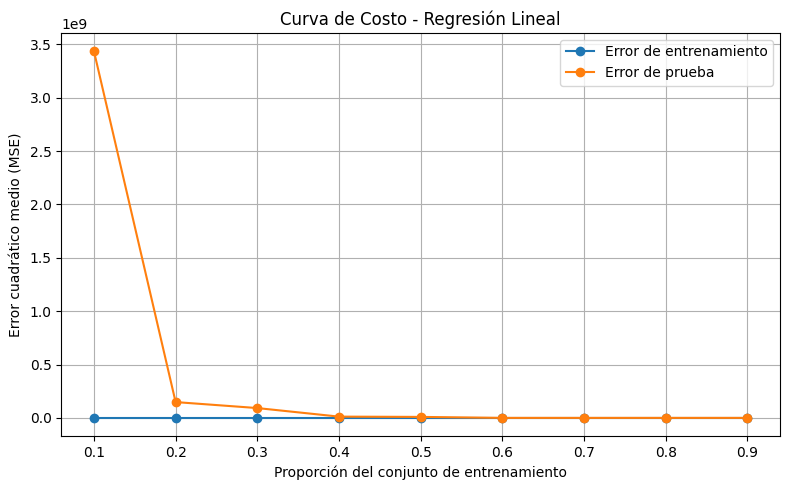

In [14]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Asumiendo que ya tienes X_train_scaled, X_test_scaled, y_train, y_test definidos

train_sizes = np.linspace(0.1, 0.9, 9) # Changed 1.0 to 0.9 to exclude 1.0
# or
# train_sizes = np.linspace(0.1, 1.0, 10)[:-1] # Exclude the last element (1.0)
train_errors = []
test_errors = []

for size in train_sizes:
    X_partial, _, y_partial, _ = train_test_split(X_train_scaled, y_train, train_size=size, random_state=42)
    modelo = LinearRegression()
    modelo.fit(X_partial, y_partial)

    # Predicciones para entrenamiento parcial y prueba
    y_partial_pred = modelo.predict(X_partial)
    y_test_pred = modelo.predict(X_test_scaled)

    # Guardar errores MSE
    train_errors.append(mean_squared_error(y_partial, y_partial_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

# Graficar curva de errores
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_errors, label='Error de entrenamiento', marker='o')
plt.plot(train_sizes, test_errors, label='Error de prueba', marker='o')
plt.xlabel('Proporción del conjunto de entrenamiento')
plt.ylabel('Error cuadrático medio (MSE)')
plt.title('Curva de Costo - Regresión Lineal')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()